IMPLEMENT A SIMPLE RNN FOR REVIEW CLASSIFICATION IMDB

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
max_features = 10000
maxlen = 500
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test accuracy:', test_acc)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - acc: 0.6180 - loss: 0.6405 - val_acc: 0.5936 - val_loss: 0.8340
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - acc: 0.8189 - loss: 0.4285 - val_acc: 0.8356 - val_loss: 0.3998
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - acc: 0.8684 - loss: 0.3287 - val_acc: 0.7544 - val_loss: 0.5804
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - acc: 0.8885 - loss: 0.2786 - val_acc: 0.8580 - val_loss: 0.3749
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - acc: 0.9262 - loss: 0.2003 - val_acc: 0.8380 - val_loss: 0.3789
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - acc: 0.9364 - loss: 0.1695 - val_acc: 0.8396 - val_loss: 0.4172
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - acc: 0.9632 - loss: 0.1065 - val_acc: 0.8408 - val_loss: 0.4680
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - acc: 0.9781 - loss: 0.0700 - val_acc: 0.8132 

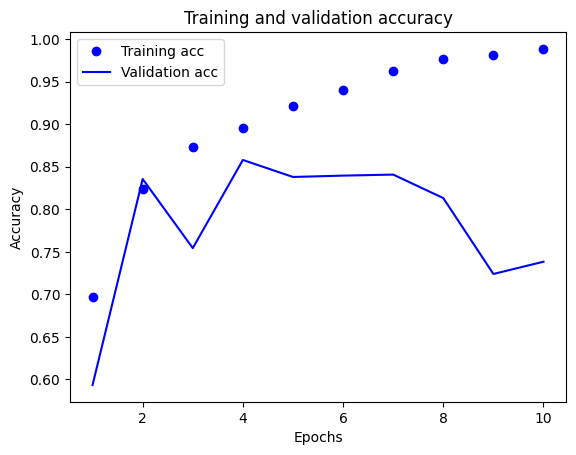

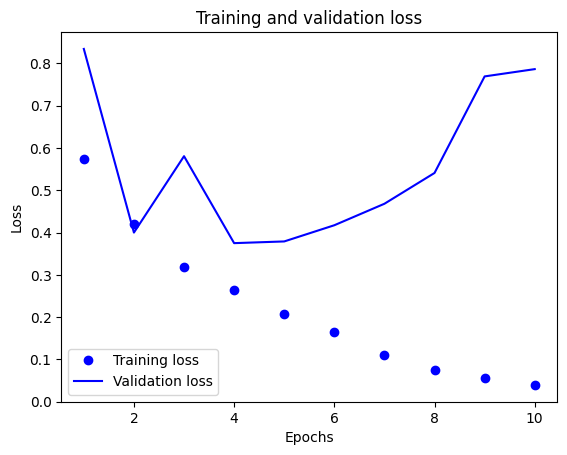

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()